# 9.2 用pandas和seaborn绘图

matplotlib是一个相对底层的工具。pandas自身有内建的可视化工具。另一个库seaborn则是用来做一些统计图形。

> 导入seaborn会改变matlotlib默认的颜色和绘图样式，提高可读性和美感。即使不适用seaborn的API，也可以利用seaborn来提高可视化的效果。

# 1 Line Plots（线图）

Series和DataFrame各自都有plot属性，用来做一些比较基本的绘图类型。默认，plot()会绘制线图：

In [1]:
%matplotlib inline
# 如果不添加这句，是无法直接在jupyter里看到图的

In [2]:
import numpy as np
import pandas as pd

In [3]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0     0.610051
10    0.136376
20   -0.704134
30   -1.896500
40   -2.568586
50   -2.458622
60   -0.382527
70   -0.796509
80   -1.120349
90   -1.612190
dtype: float64

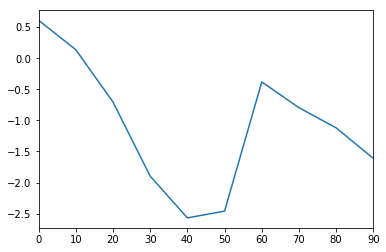

In [4]:
s.plot()

Series对象的index（索引），被matplotlib用来当做x轴，当然，我们也可以自己设定不这么做，use_index=False。x轴的ticks（标记）和limits（范围）能通过xticks和xlim选项来设定，而y轴的可以用yticks和ylim来设定。下面是关于plot的一些选项。

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/ebgnj.png)

大部分的pandas绘图方法接受一个ax参数，可以作为一个matplotlib subplot对象。这给我们更强的灵活性在gird layout（网格样式）中放置subplot。

DataFrame的plot方法，会把每一列画出一条线，所有的线会画在同一个subplot（子图）上，而且可以添加legend（图例）：

In [5]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-0.716302,0.396939,-0.603750,0.357174
10,0.164817,-0.878783,-1.351842,-0.366744
20,-0.580744,-0.779421,-0.318488,-1.251329
30,-0.833125,-1.892418,1.067101,-0.323775
40,-0.376066,-2.078398,1.358492,-1.369103
50,-1.135027,-1.645982,0.768760,-1.444519
60,0.172939,-1.675297,2.904051,-0.365266
70,0.673520,-2.076577,2.628777,-1.315191
80,0.379346,-1.781613,-0.525543,-1.290071
90,0.272595,-1.926831,-0.818354,-2.639946


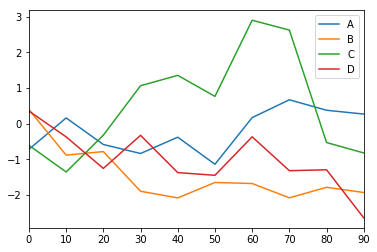

In [6]:
df.plot()

plot属性中，包含一组方法，来画出不同类型的绘图。例如，df.plot()等同于df.plot.line()。

> 一些额外的关键字可以在plot里设定，并会被matplotlib函数执行，所以我们可以学习matplotlib API来定制化想要的绘图。

DataFrame有一些选项在处理列的时候提供了灵活性；例如，是否把所有列都画在一个子图中，或者把不同列画在不同的子图中。下图有更多的设定：

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/tma2m.png)

# 2 Bar Plots（条形图）

plot.bar()和plot.barh()分别绘制垂直和水平的条形图。这种情况下，series或DataFrame的index会被用来作为x(bar)或y(barh)的ticks（标记）：

In [7]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data

a    0.209238
b    0.924075
c    0.274974
d    0.302181
e    0.863496
f    0.517346
g    0.342729
h    0.116683
i    0.682296
j    0.473291
k    0.416648
l    0.338622
m    0.461314
n    0.818375
o    0.620858
p    0.427623
dtype: float64

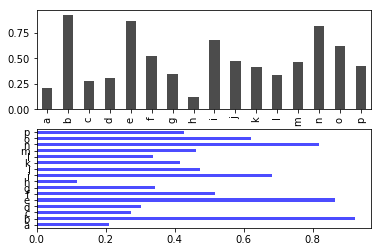

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1)
data.plot.bar(ax=axes[0], color='k', alpha=0.7) #==data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7) 
data.plot.barh(ax=axes[1], color='b', alpha=0.7) #==data.plot(kind='barh', ax=axes[1], color='b', alpha=0.3) 

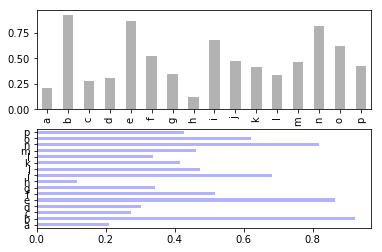

In [9]:
fig, axes = plt.subplots(2, 1)
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.3)
data.plot(kind='barh', ax=axes[1], color='b', alpha=0.3) 

color='k'设置颜色为黑，而alpha=0.7则设置局部透明度（靠近1越明显，靠近0则虚化）。

对于DataFrame，条形图绘图会把每一行作为一个组画出来：

In [10]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [11]:
df

Genus,A,B,C,D
one,0.838889,0.510494,0.839290,0.469388
two,0.188954,0.350673,0.736976,0.150587
three,0.018409,0.273239,0.896327,0.790383
four,0.412682,0.459601,0.992300,0.978890
five,0.160881,0.729441,0.811197,0.484585
six,0.238724,0.151755,0.355973,0.022229


#### 注意这里DataFrame列名的"Genus"，被作为图例

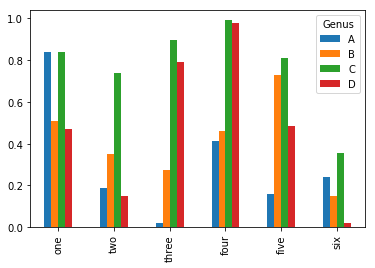

In [12]:
df.plot.bar() ## == df.plot(kind='bar')

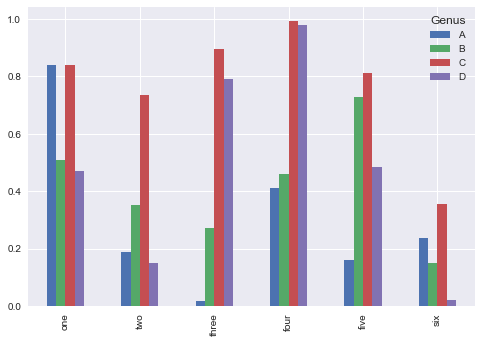

In [13]:
import seaborn

df.plot.bar() # 可以看到导入seaborn后画出来的图漂亮多了

注意这里DataFrame列名的"Genus"，被作为图例。

我们可以设定stacked=True，令条形图堆叠起来，能让每一行的所有值都被堆起来：

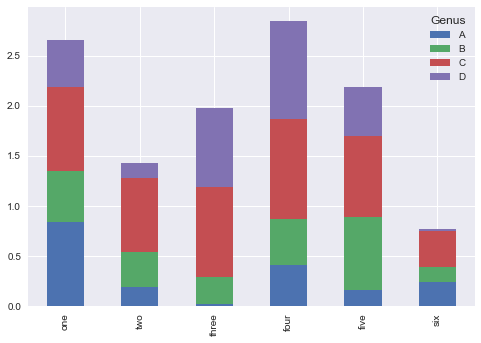

In [14]:
df.plot.bar(stacked=True)

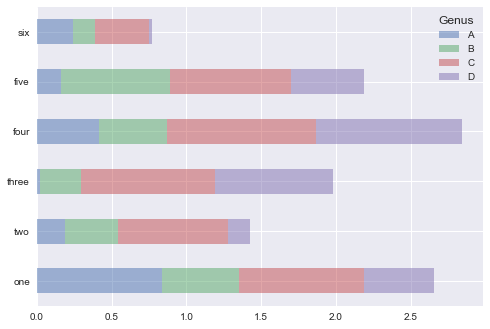

In [15]:
df.plot.barh(stacked=True, alpha=0.5)

> 一个小窍门，在画series的值出现的频率的条形图时，可以使用value_counts: `s.value_counts().plot.bar()`

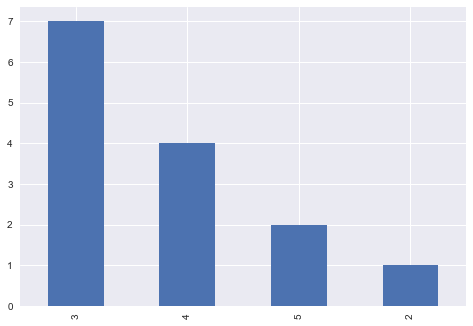

In [16]:
ser = pd.Series([2, 3, 4, 5, 4, 3, 3, 4, 3, 4, 3, 3, 3, 5])
ser.value_counts().plot.bar()

In [17]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [18]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [19]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [20]:
# 大于1人小于6人
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


标准化一下，让每一行的和变为1，然后绘图：

In [21]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


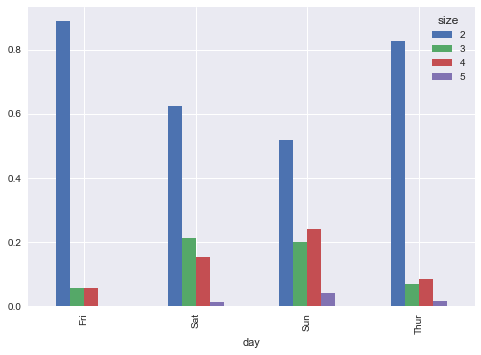

In [22]:
party_pcts.plot.bar()

这样我们可以看出来，在周末的时候组大小（party size）是增大的。

对于需要汇总的数据，使用seaborn能方便很多。让我们试一下用seaborn，按day来查看tipping percentage(小费百分比)：

In [23]:
import seaborn as sns

tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [24]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


E:\software\anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


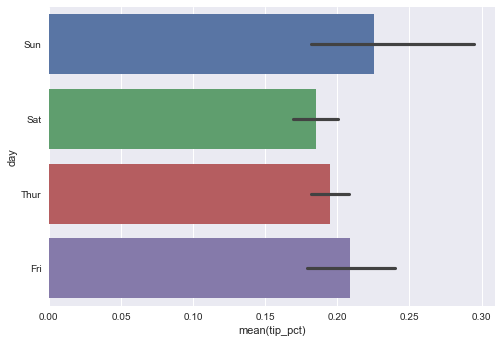

In [25]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h') 

seaborn的绘图函数中有一个data参数，这里可以导入pandas的DataFrame。其他参数指的是列名。因为每一天（比如一个固定的周六）可能会有多个不同的值，所以条形图表示的是tip_pct的平均值。条形图上的黑线表示95%的置信区间（confidence interval）（这个可以通过可选参数进行更改）。

seaborn.barplot有一个hue选项，这个能让我们通过一个额外的类别值把数据分开：


注意seaborn会自动更改绘图的外观：默认的调色板，绘图背景，网格颜色。我们可以自己设定不同的绘图外观，通过seaborn.set:

E:\software\anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


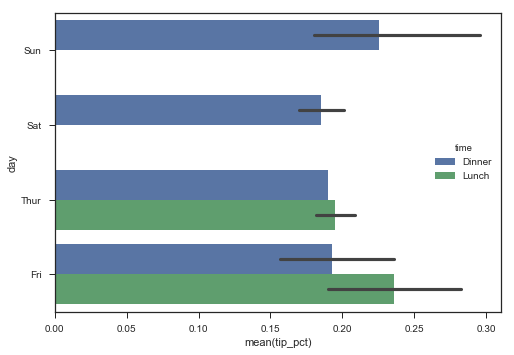

In [26]:
sns.set_style("ticks") # 我们可以换一个样式
# sns.set_style("white")
# sns.set(style='whitegrid')

sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

# 3 柱状图和密度图

柱状图是一种条形图，不过值的频率是分割式的。数据点被分割为，离散的甚至是隔开的bin（BIN是储存箱、存放箱、垃圾箱的意思，中文实在是不好翻译，我把它理解为一个小柱子，之后就直接用bin了），而且每个bin中的数据点的数量会被画出来。用上面的tipping数据集，我们可以用plot.hist做一个柱状图来表示小费（tip）占总费用（total bill）的比例：

In [27]:
tips['tip_pct'].describe()

count    244.000000
mean       0.202123
std        0.163385
min        0.036955
25%        0.148274
50%        0.183110
75%        0.236821
max        2.452381
Name: tip_pct, dtype: float64

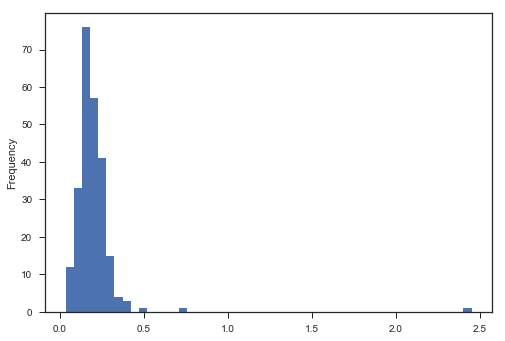

In [28]:
tips['tip_pct'].plot.hist(bins=50)

另一种相关的绘图类型是density plot（密度图），这个是用来计算观测数据中，连续概率分布的推测值。通常的步骤是用一组混合的“kernels”（核）来近似这个分布————核指的是，像正态分布一样的简单分布。因此，概率图也经常被叫做kernel density estimate(KDE, 核密度估计)图。用plot.kde，通过conventional mixture-of-normals estimate（常规混合估计
）制作一个密度图：

In [29]:
tips['tip_pct'].describe()

count    244.000000
mean       0.202123
std        0.163385
min        0.036955
25%        0.148274
50%        0.183110
75%        0.236821
max        2.452381
Name: tip_pct, dtype: float64

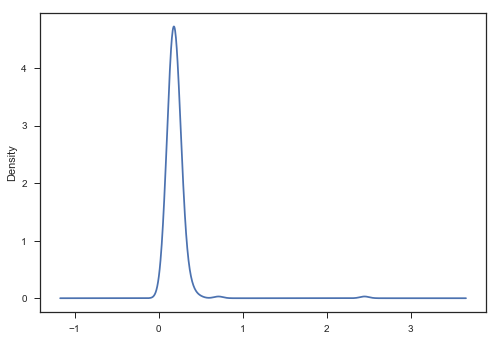

In [30]:
tips['tip_pct'].plot.density() ## tips['tip_pct'].plot(kind='kde')

seaborn能更方便地绘制柱状图和概率图，通过distplot方法，这个方法可以同时绘制一个柱状图和a continuous density estimate（一个连续密度估计）。举个例子，考虑一个bimodal distribution（双峰分布，二项分布），它由连个不同的标准正态分布组成：

In [31]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
values.describe()

count    400.000000
mean       4.856770
std        5.026008
min       -2.421354
25%       -0.027300
50%        3.805769
75%        9.610065
max       14.711379
dtype: float64

E:\software\anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


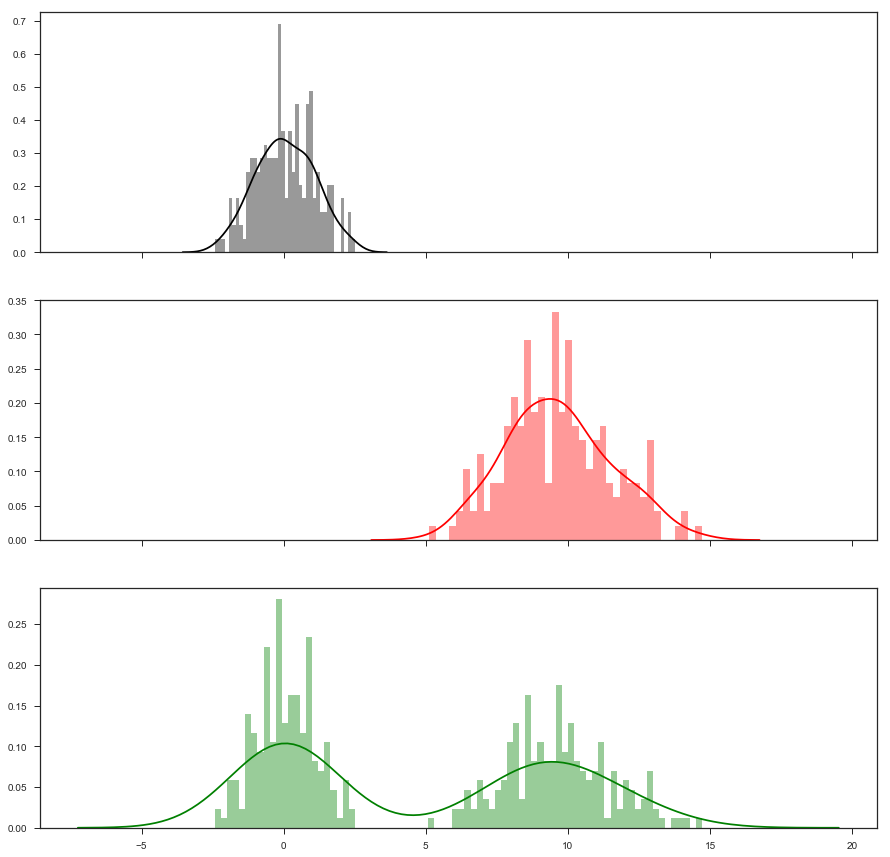

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15), sharex=True)
sns.distplot(comp1, bins=40, color='k', ax=ax1)
sns.distplot(comp2, bins=40, color='r', ax=ax2)
sns.distplot(values, bins=80, color='g', ax=ax3)
plt.show()

# 4 散点图或点图
散点图对于检查二维数据之间的关系是非常有用的。例如，我们导入macrodata数据集，选一些参数，然后计算log differences（对数差分）：

In [33]:
macro = pd.read_csv('macrodata.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [34]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [35]:
trans_data = np.log(data).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


关于对数差分译者找到的一些资料：

1 
1. 取对数(log)：缩小差距，减少异方差性
2. 差分：非平缓数据变平稳的技能

2 是原始序列的对数增长率，而且这么处理后序列会更平稳

3 
对于不平稳的时间序列，我们可以通过差分的方法使它平稳，但是差分之后的问题是有的经济意义就无法直观解释了，所以我们又有了构建协整关系这一方法。


然后我们可以利用seaborn的regplot方法，它可以产生一个散点图并拟合一条回归线：

E:\software\anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


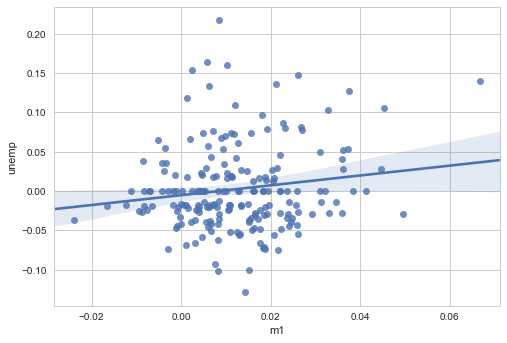

In [36]:
sns.set_style("whitegrid")
sns.regplot('m1', 'unemp', data=trans_data)

在数据探索阶段，散点图能把一组变量之间所有的散点图都画出来，这种图被称之为pairs plot（多变量图）或scatter plot matrix（散点图矩阵）。画这样的图很麻烦，所以seaborn有一个非常方便的pairplot函数，这个函数可以把每一个参数的柱状图或密度估计画在对角线上：

E:\software\anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


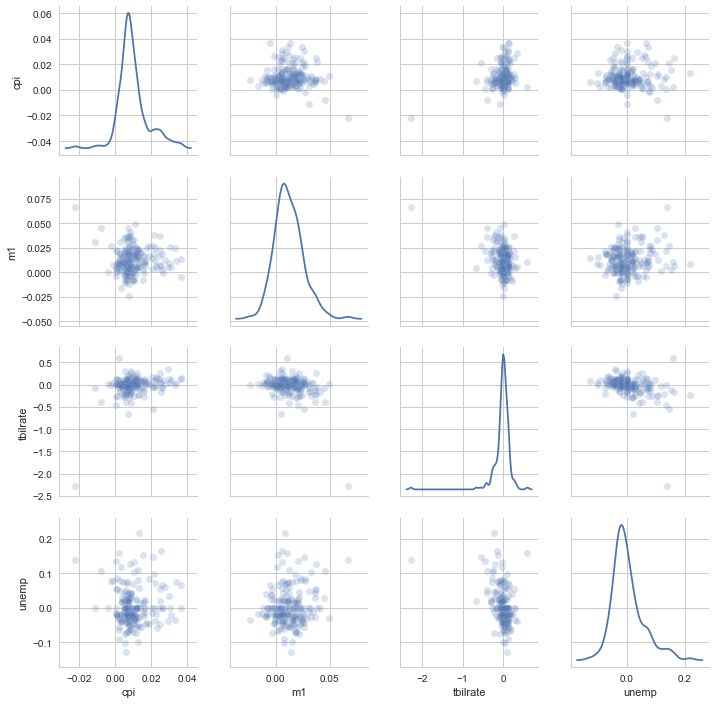

In [37]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

这里要注意一下plot_kws关键字。这个让我们能导入设置选项，用来控制非对角线上的绘图。查看seaborn.pairplot的字符串文档查看更多的设定选项。

In [38]:
# sns.pairplot?

# 5 Facet Grids and Categorical Data（多面网格和类别数据）

如果遇到一些数据集，需要额外分组的维度，该怎么办？一个方法是使用类别变量来把数据可视化，利用facet grid（多面网格）。seaborn有一个有用的内建函数factorplot，能简化制作各种多面图的过程：

E:\software\anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


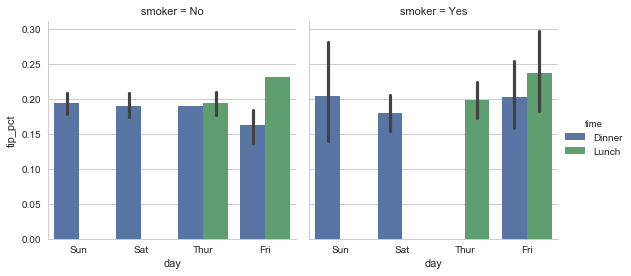

In [39]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', 
               kind='bar', data=tips[tips.tip_pct < 1])

在一个facet（面）内，不是通过time和不同的柱状颜色来分组，我们也能通过添加给每一个time值添加一行的方式来扩展多面网格：

In [40]:
tips[tips.tip_pct < 1].head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


In [49]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


E:\software\anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


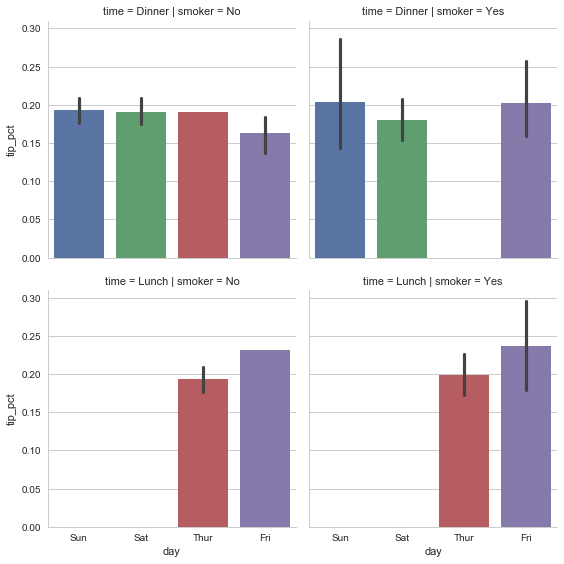

In [50]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

factorplot支持其他一些绘图类型，是否有用取决于我们想要如何展示。例如，box plots（箱线图，可以展示中位数，分位数和利群店）可能是一种有效的视觉类型：

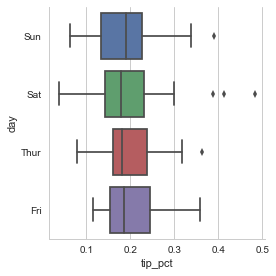

In [51]:
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

通过seaborn.FacetGrid，我们可以创建自己的多面网格图。更多信息请查看seaborn的文档。